Tuning parameters for lightGBM model. The final AUC on validation is about 0.68. 

In [8]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Load data and remove low variance features

In [2]:
import pickle

train= pickle.load(open("train_fea.pkl", "rb"))

In [3]:
train.fillna(0,inplace=True)

In [ ]:
sparse = (train>0).astype(int).sum(axis=0)/len(train.index)

In [95]:
cols_select = sparse[sparse>0].index
len(cols_select)

715

In [96]:
train.label.sum()/len(train.index)

0.06114374959228547

### Parameter tuning
*  important params: num_leaves, min_data_in_leaf, max_depth
* step 1: fit a bigger learning rate and general params
* step 2: fit max_depth and num_leaves
* step 3: fit min_child_samples
* step 4: bagging and feature fraction
* step 5: reg_alpha, reg_lambda
* step 6: smaller learning rate
* https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [10]:
"""
fit models
"""
label='label'
train_x = train.drop(label,axis=1)


models_lgb = []
params = {
  'task': 'train',
  'boosting_type': 'gbdt',
  'objective': 'binary',
  'metric': {'auc'},
  'num_leaves': 2 ** 5 - 1, # maxdepth=5
#   'min_data_in_leaf':100,
  'learning_rate': 0.05,
  'feature_fraction': 0.9,
  'bagging_fraction': 0.8,
  'bagging_freq': 5,
  'verbose': 0,
}

'\nfit models\n'

In [12]:
for i in range(1, 6):
    X_train, X_test, y_train, y_test = train_test_split(train_x, train[label], test_size=0.33, random_state=620 + i)
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    print('Start training...')
    # train
    evals_result={}
    gbm = lgb.train(params,lgb_train,valid_sets=[lgb_train, lgb_eval],verbose_eval=1,evals_result=evals_result,num_boost_round=20000, early_stopping_rounds=100)
    models_lgb.append((i, gbm, evals_result))

Start training...
[1]	training's auc: 0.630308	valid_1's auc: 0.621368
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.644262	valid_1's auc: 0.633833
[3]	training's auc: 0.648773	valid_1's auc: 0.636422
[4]	training's auc: 0.651101	valid_1's auc: 0.636753
[5]	training's auc: 0.655111	valid_1's auc: 0.639495
[6]	training's auc: 0.657839	valid_1's auc: 0.641705
[7]	training's auc: 0.660429	valid_1's auc: 0.64333
[8]	training's auc: 0.661668	valid_1's auc: 0.644452
[9]	training's auc: 0.662376	valid_1's auc: 0.644839
[10]	training's auc: 0.663086	valid_1's auc: 0.645594
[11]	training's auc: 0.665303	valid_1's auc: 0.647358
[12]	training's auc: 0.667508	valid_1's auc: 0.648262
[13]	training's auc: 0.669056	valid_1's auc: 0.649041
[14]	training's auc: 0.671092	valid_1's auc: 0.649984
[15]	training's auc: 0.672761	valid_1's auc: 0.650103
[16]	training's auc: 0.673983	valid_1's auc: 0.650234
[17]	training's auc: 0.674594	valid_1's auc: 0.650558
[18]	traini

[153]	training's auc: 0.766928	valid_1's auc: 0.670314
[154]	training's auc: 0.767344	valid_1's auc: 0.670289
[155]	training's auc: 0.767703	valid_1's auc: 0.670312
[156]	training's auc: 0.768241	valid_1's auc: 0.670329
[157]	training's auc: 0.768726	valid_1's auc: 0.670297
[158]	training's auc: 0.769135	valid_1's auc: 0.670379
[159]	training's auc: 0.769517	valid_1's auc: 0.670333
[160]	training's auc: 0.770057	valid_1's auc: 0.670205
[161]	training's auc: 0.77051	valid_1's auc: 0.670245
[162]	training's auc: 0.770886	valid_1's auc: 0.670304
[163]	training's auc: 0.771163	valid_1's auc: 0.670473
[164]	training's auc: 0.771515	valid_1's auc: 0.67039
[165]	training's auc: 0.771982	valid_1's auc: 0.670422
[166]	training's auc: 0.772561	valid_1's auc: 0.670406
[167]	training's auc: 0.77289	valid_1's auc: 0.670412
[168]	training's auc: 0.773327	valid_1's auc: 0.670464
[169]	training's auc: 0.773836	valid_1's auc: 0.67033
[170]	training's auc: 0.774283	valid_1's auc: 0.670367
[171]	training

[304]	training's auc: 0.817947	valid_1's auc: 0.670806
[305]	training's auc: 0.818062	valid_1's auc: 0.670794
[306]	training's auc: 0.818352	valid_1's auc: 0.6707
[307]	training's auc: 0.818593	valid_1's auc: 0.670668
[308]	training's auc: 0.818926	valid_1's auc: 0.670631
[309]	training's auc: 0.819212	valid_1's auc: 0.670563
[310]	training's auc: 0.819473	valid_1's auc: 0.670557
[311]	training's auc: 0.819785	valid_1's auc: 0.670609
[312]	training's auc: 0.82014	valid_1's auc: 0.670687
[313]	training's auc: 0.820272	valid_1's auc: 0.670683
[314]	training's auc: 0.820468	valid_1's auc: 0.670701
[315]	training's auc: 0.820788	valid_1's auc: 0.670718
[316]	training's auc: 0.821213	valid_1's auc: 0.670775
[317]	training's auc: 0.821501	valid_1's auc: 0.67073
[318]	training's auc: 0.821721	valid_1's auc: 0.670711
[319]	training's auc: 0.822143	valid_1's auc: 0.67069
[320]	training's auc: 0.822398	valid_1's auc: 0.670698
[321]	training's auc: 0.822608	valid_1's auc: 0.670672
[322]	training'

[108]	training's auc: 0.744782	valid_1's auc: 0.675695
[109]	training's auc: 0.745098	valid_1's auc: 0.675752
[110]	training's auc: 0.745652	valid_1's auc: 0.675827
[111]	training's auc: 0.746153	valid_1's auc: 0.675875
[112]	training's auc: 0.746688	valid_1's auc: 0.675941
[113]	training's auc: 0.747202	valid_1's auc: 0.675985
[114]	training's auc: 0.747593	valid_1's auc: 0.676107
[115]	training's auc: 0.748291	valid_1's auc: 0.67611
[116]	training's auc: 0.748989	valid_1's auc: 0.67604
[117]	training's auc: 0.749642	valid_1's auc: 0.676078
[118]	training's auc: 0.750179	valid_1's auc: 0.675988
[119]	training's auc: 0.750925	valid_1's auc: 0.675878
[120]	training's auc: 0.751509	valid_1's auc: 0.675968
[121]	training's auc: 0.751969	valid_1's auc: 0.67597
[122]	training's auc: 0.75253	valid_1's auc: 0.676101
[123]	training's auc: 0.752708	valid_1's auc: 0.676121
[124]	training's auc: 0.752965	valid_1's auc: 0.676154
[125]	training's auc: 0.753296	valid_1's auc: 0.676158
[126]	training

[261]	training's auc: 0.810444	valid_1's auc: 0.678796
[262]	training's auc: 0.810848	valid_1's auc: 0.678784
[263]	training's auc: 0.811536	valid_1's auc: 0.67885
[264]	training's auc: 0.81189	valid_1's auc: 0.678853
[265]	training's auc: 0.812268	valid_1's auc: 0.678775
[266]	training's auc: 0.812433	valid_1's auc: 0.678754
[267]	training's auc: 0.81266	valid_1's auc: 0.678751
[268]	training's auc: 0.812814	valid_1's auc: 0.678766
[269]	training's auc: 0.813093	valid_1's auc: 0.67881
[270]	training's auc: 0.813345	valid_1's auc: 0.678759
[271]	training's auc: 0.813668	valid_1's auc: 0.678706
[272]	training's auc: 0.813802	valid_1's auc: 0.678728
[273]	training's auc: 0.81401	valid_1's auc: 0.678689
[274]	training's auc: 0.814149	valid_1's auc: 0.678658
[275]	training's auc: 0.814488	valid_1's auc: 0.678623
[276]	training's auc: 0.814878	valid_1's auc: 0.678696
[277]	training's auc: 0.81516	valid_1's auc: 0.678628
[278]	training's auc: 0.815453	valid_1's auc: 0.678607
[279]	training's

[100]	training's auc: 0.73834	valid_1's auc: 0.672523
[101]	training's auc: 0.738862	valid_1's auc: 0.672591
[102]	training's auc: 0.739295	valid_1's auc: 0.672643
[103]	training's auc: 0.739695	valid_1's auc: 0.672606
[104]	training's auc: 0.740135	valid_1's auc: 0.672602
[105]	training's auc: 0.74046	valid_1's auc: 0.672602
[106]	training's auc: 0.740938	valid_1's auc: 0.672688
[107]	training's auc: 0.741388	valid_1's auc: 0.672751
[108]	training's auc: 0.741816	valid_1's auc: 0.672752
[109]	training's auc: 0.742204	valid_1's auc: 0.672786
[110]	training's auc: 0.742623	valid_1's auc: 0.672725
[111]	training's auc: 0.743012	valid_1's auc: 0.672851
[112]	training's auc: 0.743644	valid_1's auc: 0.67302
[113]	training's auc: 0.744218	valid_1's auc: 0.673069
[114]	training's auc: 0.744812	valid_1's auc: 0.673085
[115]	training's auc: 0.745323	valid_1's auc: 0.673189
[116]	training's auc: 0.74618	valid_1's auc: 0.673188
[117]	training's auc: 0.746925	valid_1's auc: 0.673281
[118]	training

[250]	training's auc: 0.80292	valid_1's auc: 0.675823
[251]	training's auc: 0.803327	valid_1's auc: 0.675933
[252]	training's auc: 0.803651	valid_1's auc: 0.675962
[253]	training's auc: 0.804078	valid_1's auc: 0.675939
[254]	training's auc: 0.804504	valid_1's auc: 0.675821
[255]	training's auc: 0.804667	valid_1's auc: 0.675785
[256]	training's auc: 0.80494	valid_1's auc: 0.675832
[257]	training's auc: 0.805276	valid_1's auc: 0.675783
[258]	training's auc: 0.805639	valid_1's auc: 0.675761
[259]	training's auc: 0.806044	valid_1's auc: 0.675843
[260]	training's auc: 0.806414	valid_1's auc: 0.675862
[261]	training's auc: 0.806935	valid_1's auc: 0.675798
[262]	training's auc: 0.80746	valid_1's auc: 0.675759
[263]	training's auc: 0.807776	valid_1's auc: 0.675829
[264]	training's auc: 0.808211	valid_1's auc: 0.67572
[265]	training's auc: 0.808333	valid_1's auc: 0.675732
[266]	training's auc: 0.808565	valid_1's auc: 0.675741
[267]	training's auc: 0.808814	valid_1's auc: 0.675722
[268]	training

[400]	training's auc: 0.843714	valid_1's auc: 0.676479
[401]	training's auc: 0.844085	valid_1's auc: 0.676512
[402]	training's auc: 0.844468	valid_1's auc: 0.676469
[403]	training's auc: 0.844702	valid_1's auc: 0.676474
[404]	training's auc: 0.844901	valid_1's auc: 0.676502
[405]	training's auc: 0.845178	valid_1's auc: 0.676499
[406]	training's auc: 0.84551	valid_1's auc: 0.676387
[407]	training's auc: 0.845636	valid_1's auc: 0.6764
[408]	training's auc: 0.845867	valid_1's auc: 0.676295
[409]	training's auc: 0.846061	valid_1's auc: 0.676204
[410]	training's auc: 0.84619	valid_1's auc: 0.676287
[411]	training's auc: 0.846379	valid_1's auc: 0.676284
[412]	training's auc: 0.846513	valid_1's auc: 0.676277
[413]	training's auc: 0.847007	valid_1's auc: 0.676256
[414]	training's auc: 0.847116	valid_1's auc: 0.676249
[415]	training's auc: 0.847536	valid_1's auc: 0.676201
[416]	training's auc: 0.847706	valid_1's auc: 0.676182
[417]	training's auc: 0.847925	valid_1's auc: 0.676132
[418]	training

[98]	training's auc: 0.737574	valid_1's auc: 0.679031
[99]	training's auc: 0.738277	valid_1's auc: 0.67902
[100]	training's auc: 0.738788	valid_1's auc: 0.67922
[101]	training's auc: 0.739242	valid_1's auc: 0.679406
[102]	training's auc: 0.739467	valid_1's auc: 0.679461
[103]	training's auc: 0.740069	valid_1's auc: 0.67957
[104]	training's auc: 0.74063	valid_1's auc: 0.67965
[105]	training's auc: 0.740859	valid_1's auc: 0.679677
[106]	training's auc: 0.741188	valid_1's auc: 0.679743
[107]	training's auc: 0.741783	valid_1's auc: 0.67978
[108]	training's auc: 0.742331	valid_1's auc: 0.679797
[109]	training's auc: 0.742656	valid_1's auc: 0.679866
[110]	training's auc: 0.743052	valid_1's auc: 0.679821
[111]	training's auc: 0.743398	valid_1's auc: 0.679866
[112]	training's auc: 0.744	valid_1's auc: 0.679916
[113]	training's auc: 0.744606	valid_1's auc: 0.679965
[114]	training's auc: 0.745307	valid_1's auc: 0.679949
[115]	training's auc: 0.745766	valid_1's auc: 0.680094
[116]	training's auc:

[250]	training's auc: 0.799423	valid_1's auc: 0.682068
[251]	training's auc: 0.799681	valid_1's auc: 0.68196
[252]	training's auc: 0.800122	valid_1's auc: 0.681941
[253]	training's auc: 0.800528	valid_1's auc: 0.681786
[254]	training's auc: 0.801094	valid_1's auc: 0.681751
[255]	training's auc: 0.801275	valid_1's auc: 0.68175
[256]	training's auc: 0.801479	valid_1's auc: 0.681891
[257]	training's auc: 0.801665	valid_1's auc: 0.681859
[258]	training's auc: 0.802122	valid_1's auc: 0.681832
[259]	training's auc: 0.80246	valid_1's auc: 0.681748
[260]	training's auc: 0.802611	valid_1's auc: 0.681763
[261]	training's auc: 0.803027	valid_1's auc: 0.681842
[262]	training's auc: 0.803418	valid_1's auc: 0.681947
[263]	training's auc: 0.803743	valid_1's auc: 0.681973
[264]	training's auc: 0.804014	valid_1's auc: 0.681947
[265]	training's auc: 0.804253	valid_1's auc: 0.68194
[266]	training's auc: 0.804737	valid_1's auc: 0.681839
[267]	training's auc: 0.805114	valid_1's auc: 0.681804
[268]	training

[400]	training's auc: 0.840584	valid_1's auc: 0.681396
[401]	training's auc: 0.840927	valid_1's auc: 0.681408
[402]	training's auc: 0.841177	valid_1's auc: 0.681402
[403]	training's auc: 0.841367	valid_1's auc: 0.681415
[404]	training's auc: 0.841654	valid_1's auc: 0.681465
[405]	training's auc: 0.841978	valid_1's auc: 0.681467
[406]	training's auc: 0.842144	valid_1's auc: 0.681436
[407]	training's auc: 0.842416	valid_1's auc: 0.68146
[408]	training's auc: 0.842715	valid_1's auc: 0.681404
[409]	training's auc: 0.842951	valid_1's auc: 0.681403
[410]	training's auc: 0.843405	valid_1's auc: 0.681297
[411]	training's auc: 0.843591	valid_1's auc: 0.681279
[412]	training's auc: 0.843734	valid_1's auc: 0.681184
[413]	training's auc: 0.843863	valid_1's auc: 0.681153
[414]	training's auc: 0.844166	valid_1's auc: 0.681075
[415]	training's auc: 0.844283	valid_1's auc: 0.681031
[416]	training's auc: 0.844579	valid_1's auc: 0.680904
[417]	training's auc: 0.844831	valid_1's auc: 0.680755
[418]	train

[108]	training's auc: 0.746874	valid_1's auc: 0.671714
[109]	training's auc: 0.747487	valid_1's auc: 0.671676
[110]	training's auc: 0.74797	valid_1's auc: 0.671645
[111]	training's auc: 0.748635	valid_1's auc: 0.671863
[112]	training's auc: 0.748906	valid_1's auc: 0.671877
[113]	training's auc: 0.749372	valid_1's auc: 0.671922
[114]	training's auc: 0.749751	valid_1's auc: 0.671978
[115]	training's auc: 0.750163	valid_1's auc: 0.672181
[116]	training's auc: 0.750863	valid_1's auc: 0.672213
[117]	training's auc: 0.751435	valid_1's auc: 0.672245
[118]	training's auc: 0.752009	valid_1's auc: 0.672202
[119]	training's auc: 0.752609	valid_1's auc: 0.672136
[120]	training's auc: 0.753028	valid_1's auc: 0.67211
[121]	training's auc: 0.753557	valid_1's auc: 0.672328
[122]	training's auc: 0.754096	valid_1's auc: 0.672388
[123]	training's auc: 0.754491	valid_1's auc: 0.672544
[124]	training's auc: 0.754845	valid_1's auc: 0.672647
[125]	training's auc: 0.755184	valid_1's auc: 0.672663
[126]	traini

[260]	training's auc: 0.806351	valid_1's auc: 0.674543
[261]	training's auc: 0.806505	valid_1's auc: 0.674543
[262]	training's auc: 0.806669	valid_1's auc: 0.674489
[263]	training's auc: 0.80724	valid_1's auc: 0.674742
[264]	training's auc: 0.807481	valid_1's auc: 0.674802
[265]	training's auc: 0.807747	valid_1's auc: 0.674735
[266]	training's auc: 0.808263	valid_1's auc: 0.674739
[267]	training's auc: 0.808507	valid_1's auc: 0.674761
[268]	training's auc: 0.808827	valid_1's auc: 0.674763
[269]	training's auc: 0.809311	valid_1's auc: 0.674726
[270]	training's auc: 0.809468	valid_1's auc: 0.674792
[271]	training's auc: 0.809931	valid_1's auc: 0.67469
[272]	training's auc: 0.810298	valid_1's auc: 0.674695
[273]	training's auc: 0.810599	valid_1's auc: 0.674756
[274]	training's auc: 0.811086	valid_1's auc: 0.674756
[275]	training's auc: 0.811522	valid_1's auc: 0.674737
[276]	training's auc: 0.811669	valid_1's auc: 0.674675
[277]	training's auc: 0.811945	valid_1's auc: 0.674631
[278]	traini

[411]	training's auc: 0.846434	valid_1's auc: 0.674926
[412]	training's auc: 0.846573	valid_1's auc: 0.674923
[413]	training's auc: 0.846713	valid_1's auc: 0.674926
[414]	training's auc: 0.84686	valid_1's auc: 0.674971
[415]	training's auc: 0.846933	valid_1's auc: 0.675046
[416]	training's auc: 0.847261	valid_1's auc: 0.675093
[417]	training's auc: 0.847509	valid_1's auc: 0.675068
[418]	training's auc: 0.847886	valid_1's auc: 0.674994
[419]	training's auc: 0.84819	valid_1's auc: 0.675064
[420]	training's auc: 0.848403	valid_1's auc: 0.675019
[421]	training's auc: 0.848663	valid_1's auc: 0.67509
[422]	training's auc: 0.848725	valid_1's auc: 0.67511
[423]	training's auc: 0.848806	valid_1's auc: 0.675098
[424]	training's auc: 0.848971	valid_1's auc: 0.675122
[425]	training's auc: 0.849169	valid_1's auc: 0.675111
[426]	training's auc: 0.849444	valid_1's auc: 0.675077
[427]	training's auc: 0.849676	valid_1's auc: 0.675025
[428]	training's auc: 0.849891	valid_1's auc: 0.675102
[429]	training

#### Tune max_depth and num_leaves

In [14]:

X_train, X_test, y_train, y_test = train_test_split(train_x, train[label], test_size=0.33, random_state=0)

parameters = {
                'max_depth': [3,5,7,9] ,
                'num_leaves':[30,50,70,90],
}

gbm = lgb.LGBMClassifier(learning_rate=.1,boosting_type='gbdt',objective='binary',metric='auc',feature_fraction=.9,bagging_fraction=0.8,num_leaves=30,bagging_freq=5,max_depth=5)
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(X_train, y_train)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=5,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      feature_fraction=0.9,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=5,
                                      metric='auc', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=30,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_

Best score: 0.667
Best parameters set:
	max_depth: 5
	num_leaves: 30


In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train[label], test_size=0.33, random_state=0)

parameters = {
                'num_leaves':[10,20,30],
}

gbm = lgb.LGBMClassifier(learning_rate=.1,boosting_type='gbdt',objective='binary',metric='auc',feature_fraction=.9,bagging_fraction=0.8,num_leaves=30,bagging_freq=5,max_depth=5)
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(X_train, y_train)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=5,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      feature_fraction=0.9,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=5,
                                      metric='auc', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=30,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_

Best score: 0.668
Best parameters set:
	num_leaves: 10


#### tune min_data_in_leaf

In [16]:


X_train, X_test, y_train, y_test = train_test_split(train_x, train[label], test_size=0.33, random_state=0)

parameters = {
                  'min_child_samples': [20, 70, 120, 170, 220],    
}

gbm = lgb.LGBMClassifier(learning_rate=.1,boosting_type='gbdt',objective='binary',metric='auc',feature_fraction=.9,bagging_fraction=0.8,num_leaves=10,bagging_freq=5,max_depth=5)
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(X_train, y_train)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))



GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=5,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      feature_fraction=0.9,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=5,
                                      metric='auc', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=10,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_

Best score: 0.669
Best parameters set:
	min_child_samples: 220


#### Tune min_child_samples 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train[label], test_size=0.33, random_state=0)

parameters = {
                  'min_child_samples': [220,500,1000,5000,10000],    
}

gbm = lgb.LGBMClassifier(learning_rate=.1,boosting_type='gbdt',objective='binary',metric='auc',feature_fraction=.9,bagging_fraction=0.8,num_leaves=10,bagging_freq=5,max_depth=5)
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(X_train, y_train)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=5,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      feature_fraction=0.9,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=5,
                                      metric='auc', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=10,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_

Best score: 0.670
Best parameters set:
	min_child_samples: 500


#### Tune feature and bagging fraction

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train[label], test_size=0.33, random_state=0)

parameters = {
              'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9],    
                'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
}

gbm = lgb.LGBMClassifier(learning_rate=.1,boosting_type='gbdt',objective='binary',metric='auc',feature_fraction=.9,bagging_fraction=0.8,num_leaves=10,bagging_freq=5,max_depth=5,min_child_samples=500)
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(X_train, y_train)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=5,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      feature_fraction=0.9,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=5,
                                      metric='auc', min_child_samples=500,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1,...eaves=10,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bi

Best score: 0.670
Best parameters set:
	bagging_fraction: 0.9
	feature_fraction: 0.8


#### Tune regularization params

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train[label], test_size=0.33, random_state=0)

parameters = {
             'reg_alpha': [0, 0.01, 0.1, 0.5],    
            'reg_lambda': [0, 0.01, 0.1, 0.5]
}


gbm = lgb.LGBMClassifier(learning_rate=.1,boosting_type='gbdt',objective='binary',metric='auc',num_leaves=10,bagging_freq=5,max_depth=5,min_child_samples=500,feature_fraction=0.9,bagging_fraction=0.8)
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(X_train, y_train)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=5,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      feature_fraction=0.9,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=5,
                                      metric='auc', min_child_samples=500,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=10,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for

Best score: 0.670
Best parameters set:
	reg_alpha: 0.01
	reg_lambda: 0


#### Put all together

In [90]:
"""
fit models
"""
label='label'
train_x = train[cols_select].drop([label,'user_id','merchant_id'],axis=1)


models_lgb = []

# (learning_rate=.1,boosting_type='gbdt',objective='binary',metric='auc',num_leaves=10,bagging_freq=5,max_depth=5,min_child_samples=500,feature_fraction=0.9,bagging_fraction=0.8)
params = {
  'task': 'train',
  'boosting_type': 'gbdt',
  'objective': 'binary',
  'metric': {'auc'},
  'num_leaves': 10, 
   'max_depth': 5,
   'min_child_samples':500,
   'reg_alpha':0.01,
   'reg_lambda':0,
  'learning_rate': 0.05,
  'feature_fraction': 0.8,
  'bagging_fraction': 0.9,
  'bagging_freq': 5,
  'verbose': 0,
}
for i in range(1, 6):
    X_train, X_test, y_train, y_test = train_test_split(train_x, train[label], test_size=0.33, random_state=620 + i)
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    print('Start training...')
    # train
    evals_result={}
    gbm = lgb.train(params,lgb_train,valid_sets=[lgb_train, lgb_eval],verbose_eval=1,evals_result=evals_result,num_boost_round=20000, early_stopping_rounds=100)
    models_lgb.append((i, gbm, evals_result))

'\nfit models\n'

Start training...
[1]	training's auc: 0.621755	valid_1's auc: 0.615765
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.630557	valid_1's auc: 0.625283
[3]	training's auc: 0.634196	valid_1's auc: 0.62893
[4]	training's auc: 0.640152	valid_1's auc: 0.63281
[5]	training's auc: 0.641383	valid_1's auc: 0.633903
[6]	training's auc: 0.644627	valid_1's auc: 0.635351
[7]	training's auc: 0.645184	valid_1's auc: 0.63497
[8]	training's auc: 0.646934	valid_1's auc: 0.635696
[9]	training's auc: 0.646792	valid_1's auc: 0.634593
[10]	training's auc: 0.646509	valid_1's auc: 0.63382
[11]	training's auc: 0.647445	valid_1's auc: 0.634672
[12]	training's auc: 0.64762	valid_1's auc: 0.634607
[13]	training's auc: 0.648089	valid_1's auc: 0.634583
[14]	training's auc: 0.649355	valid_1's auc: 0.635893
[15]	training's auc: 0.650434	valid_1's auc: 0.637024
[16]	training's auc: 0.650658	valid_1's auc: 0.637802
[17]	training's auc: 0.651192	valid_1's auc: 0.638523
[18]	training's

[155]	training's auc: 0.695534	valid_1's auc: 0.666625
[156]	training's auc: 0.69566	valid_1's auc: 0.666689
[157]	training's auc: 0.695785	valid_1's auc: 0.666724
[158]	training's auc: 0.695913	valid_1's auc: 0.666726
[159]	training's auc: 0.696096	valid_1's auc: 0.666774
[160]	training's auc: 0.696221	valid_1's auc: 0.666822
[161]	training's auc: 0.696316	valid_1's auc: 0.666829
[162]	training's auc: 0.696493	valid_1's auc: 0.66688
[163]	training's auc: 0.69661	valid_1's auc: 0.666872
[164]	training's auc: 0.696758	valid_1's auc: 0.666921
[165]	training's auc: 0.696964	valid_1's auc: 0.667051
[166]	training's auc: 0.697116	valid_1's auc: 0.667138
[167]	training's auc: 0.697261	valid_1's auc: 0.66718
[168]	training's auc: 0.69735	valid_1's auc: 0.66719
[169]	training's auc: 0.697522	valid_1's auc: 0.667295
[170]	training's auc: 0.697666	valid_1's auc: 0.667397
[171]	training's auc: 0.697868	valid_1's auc: 0.667457
[172]	training's auc: 0.698052	valid_1's auc: 0.667539
[173]	training's

[305]	training's auc: 0.713429	valid_1's auc: 0.671727
[306]	training's auc: 0.713485	valid_1's auc: 0.671792
[307]	training's auc: 0.713591	valid_1's auc: 0.671843
[308]	training's auc: 0.713657	valid_1's auc: 0.671851
[309]	training's auc: 0.713679	valid_1's auc: 0.671811
[310]	training's auc: 0.713782	valid_1's auc: 0.671818
[311]	training's auc: 0.713908	valid_1's auc: 0.671834
[312]	training's auc: 0.714019	valid_1's auc: 0.671876
[313]	training's auc: 0.714117	valid_1's auc: 0.671945
[314]	training's auc: 0.714213	valid_1's auc: 0.671949
[315]	training's auc: 0.7143	valid_1's auc: 0.671895
[316]	training's auc: 0.714409	valid_1's auc: 0.671931
[317]	training's auc: 0.714533	valid_1's auc: 0.671974
[318]	training's auc: 0.714621	valid_1's auc: 0.672001
[319]	training's auc: 0.714689	valid_1's auc: 0.671983
[320]	training's auc: 0.714753	valid_1's auc: 0.671955
[321]	training's auc: 0.714825	valid_1's auc: 0.671978
[322]	training's auc: 0.714876	valid_1's auc: 0.67202
[323]	trainin

[458]	training's auc: 0.726964	valid_1's auc: 0.673431
[459]	training's auc: 0.727046	valid_1's auc: 0.673424
[460]	training's auc: 0.727108	valid_1's auc: 0.673422
[461]	training's auc: 0.727115	valid_1's auc: 0.673422
[462]	training's auc: 0.727238	valid_1's auc: 0.673387
[463]	training's auc: 0.727273	valid_1's auc: 0.673304
[464]	training's auc: 0.727324	valid_1's auc: 0.673271
[465]	training's auc: 0.727359	valid_1's auc: 0.673283
[466]	training's auc: 0.727508	valid_1's auc: 0.673265
[467]	training's auc: 0.72758	valid_1's auc: 0.673276
[468]	training's auc: 0.727633	valid_1's auc: 0.67323
[469]	training's auc: 0.727691	valid_1's auc: 0.673228
[470]	training's auc: 0.727772	valid_1's auc: 0.673211
[471]	training's auc: 0.727841	valid_1's auc: 0.673196
[472]	training's auc: 0.72791	valid_1's auc: 0.673183
[473]	training's auc: 0.728015	valid_1's auc: 0.673228
[474]	training's auc: 0.728103	valid_1's auc: 0.673298
[475]	training's auc: 0.728149	valid_1's auc: 0.673303
[476]	trainin

[48]	training's auc: 0.666591	valid_1's auc: 0.660197
[49]	training's auc: 0.666875	valid_1's auc: 0.660335
[50]	training's auc: 0.667324	valid_1's auc: 0.660795
[51]	training's auc: 0.667738	valid_1's auc: 0.661169
[52]	training's auc: 0.668076	valid_1's auc: 0.661437
[53]	training's auc: 0.668343	valid_1's auc: 0.661514
[54]	training's auc: 0.668629	valid_1's auc: 0.661657
[55]	training's auc: 0.669068	valid_1's auc: 0.662048
[56]	training's auc: 0.669331	valid_1's auc: 0.662298
[57]	training's auc: 0.669615	valid_1's auc: 0.662485
[58]	training's auc: 0.670092	valid_1's auc: 0.662736
[59]	training's auc: 0.670449	valid_1's auc: 0.662907
[60]	training's auc: 0.6708	valid_1's auc: 0.663151
[61]	training's auc: 0.671219	valid_1's auc: 0.663344
[62]	training's auc: 0.671671	valid_1's auc: 0.663504
[63]	training's auc: 0.672003	valid_1's auc: 0.663657
[64]	training's auc: 0.67233	valid_1's auc: 0.663804
[65]	training's auc: 0.672527	valid_1's auc: 0.66391
[66]	training's auc: 0.672844	va

[199]	training's auc: 0.700519	valid_1's auc: 0.676796
[200]	training's auc: 0.700556	valid_1's auc: 0.676805
[201]	training's auc: 0.700724	valid_1's auc: 0.676989
[202]	training's auc: 0.700833	valid_1's auc: 0.676981
[203]	training's auc: 0.700964	valid_1's auc: 0.677082
[204]	training's auc: 0.701102	valid_1's auc: 0.677083
[205]	training's auc: 0.701166	valid_1's auc: 0.677084
[206]	training's auc: 0.701358	valid_1's auc: 0.677047
[207]	training's auc: 0.701501	valid_1's auc: 0.677062
[208]	training's auc: 0.70161	valid_1's auc: 0.67705
[209]	training's auc: 0.701761	valid_1's auc: 0.677024
[210]	training's auc: 0.701925	valid_1's auc: 0.677068
[211]	training's auc: 0.702148	valid_1's auc: 0.677148
[212]	training's auc: 0.702303	valid_1's auc: 0.677258
[213]	training's auc: 0.702406	valid_1's auc: 0.67731
[214]	training's auc: 0.702592	valid_1's auc: 0.677415
[215]	training's auc: 0.702845	valid_1's auc: 0.677532
[216]	training's auc: 0.703023	valid_1's auc: 0.677606
[217]	trainin

[350]	training's auc: 0.717044	valid_1's auc: 0.680534
[351]	training's auc: 0.717147	valid_1's auc: 0.68056
[352]	training's auc: 0.717306	valid_1's auc: 0.680648
[353]	training's auc: 0.717386	valid_1's auc: 0.680691
[354]	training's auc: 0.717435	valid_1's auc: 0.680677
[355]	training's auc: 0.717588	valid_1's auc: 0.680709
[356]	training's auc: 0.717648	valid_1's auc: 0.680715
[357]	training's auc: 0.717704	valid_1's auc: 0.680706
[358]	training's auc: 0.717728	valid_1's auc: 0.680694
[359]	training's auc: 0.717816	valid_1's auc: 0.680727
[360]	training's auc: 0.71787	valid_1's auc: 0.680738
[361]	training's auc: 0.717944	valid_1's auc: 0.680714
[362]	training's auc: 0.717975	valid_1's auc: 0.68069
[363]	training's auc: 0.717997	valid_1's auc: 0.680668
[364]	training's auc: 0.718047	valid_1's auc: 0.680665
[365]	training's auc: 0.718077	valid_1's auc: 0.680675
[366]	training's auc: 0.718209	valid_1's auc: 0.680589
[367]	training's auc: 0.718316	valid_1's auc: 0.680565
[368]	trainin

[499]	training's auc: 0.728836	valid_1's auc: 0.681
[500]	training's auc: 0.728861	valid_1's auc: 0.681
[501]	training's auc: 0.728933	valid_1's auc: 0.681031
[502]	training's auc: 0.728996	valid_1's auc: 0.681099
[503]	training's auc: 0.729078	valid_1's auc: 0.68108
[504]	training's auc: 0.729086	valid_1's auc: 0.681101
[505]	training's auc: 0.729195	valid_1's auc: 0.681109
[506]	training's auc: 0.729247	valid_1's auc: 0.681105
[507]	training's auc: 0.729289	valid_1's auc: 0.681094
[508]	training's auc: 0.729412	valid_1's auc: 0.681066
[509]	training's auc: 0.729492	valid_1's auc: 0.681028
[510]	training's auc: 0.729557	valid_1's auc: 0.681038
[511]	training's auc: 0.729637	valid_1's auc: 0.681025
[512]	training's auc: 0.729731	valid_1's auc: 0.681033
[513]	training's auc: 0.729865	valid_1's auc: 0.68103
[514]	training's auc: 0.729936	valid_1's auc: 0.681011
[515]	training's auc: 0.730035	valid_1's auc: 0.680983
[516]	training's auc: 0.73016	valid_1's auc: 0.680999
[517]	training's au

[649]	training's auc: 0.740263	valid_1's auc: 0.681963
[650]	training's auc: 0.740309	valid_1's auc: 0.681931
[651]	training's auc: 0.740368	valid_1's auc: 0.681905
[652]	training's auc: 0.740424	valid_1's auc: 0.681895
[653]	training's auc: 0.740463	valid_1's auc: 0.68187
[654]	training's auc: 0.74056	valid_1's auc: 0.681849
[655]	training's auc: 0.740598	valid_1's auc: 0.681859
[656]	training's auc: 0.740595	valid_1's auc: 0.681865
[657]	training's auc: 0.740604	valid_1's auc: 0.68187
[658]	training's auc: 0.740626	valid_1's auc: 0.681875
[659]	training's auc: 0.740709	valid_1's auc: 0.681873
[660]	training's auc: 0.740737	valid_1's auc: 0.681871
[661]	training's auc: 0.740767	valid_1's auc: 0.681896
[662]	training's auc: 0.740824	valid_1's auc: 0.681874
[663]	training's auc: 0.740903	valid_1's auc: 0.681877
[664]	training's auc: 0.740978	valid_1's auc: 0.681898
[665]	training's auc: 0.741018	valid_1's auc: 0.681927
[666]	training's auc: 0.741065	valid_1's auc: 0.681936
[667]	trainin

[800]	training's auc: 0.749127	valid_1's auc: 0.681715
[801]	training's auc: 0.74918	valid_1's auc: 0.681722
[802]	training's auc: 0.749251	valid_1's auc: 0.681705
[803]	training's auc: 0.749297	valid_1's auc: 0.681707
[804]	training's auc: 0.749366	valid_1's auc: 0.681678
[805]	training's auc: 0.749412	valid_1's auc: 0.681679
[806]	training's auc: 0.749492	valid_1's auc: 0.681689
[807]	training's auc: 0.749564	valid_1's auc: 0.681678
[808]	training's auc: 0.749629	valid_1's auc: 0.681624
[809]	training's auc: 0.749698	valid_1's auc: 0.681595
[810]	training's auc: 0.74978	valid_1's auc: 0.68159
Early stopping, best iteration is:
[710]	training's auc: 0.74348	valid_1's auc: 0.682203
Start training...
[1]	training's auc: 0.621101	valid_1's auc: 0.61747
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.627035	valid_1's auc: 0.622505
[3]	training's auc: 0.633101	valid_1's auc: 0.628852
[4]	training's auc: 0.635075	valid_1's auc: 0.629804
[5]	training's au

[141]	training's auc: 0.692373	valid_1's auc: 0.670637
[142]	training's auc: 0.692441	valid_1's auc: 0.670696
[143]	training's auc: 0.692638	valid_1's auc: 0.670862
[144]	training's auc: 0.692917	valid_1's auc: 0.670908
[145]	training's auc: 0.693146	valid_1's auc: 0.670988
[146]	training's auc: 0.693252	valid_1's auc: 0.671047
[147]	training's auc: 0.693403	valid_1's auc: 0.671091
[148]	training's auc: 0.693637	valid_1's auc: 0.671132
[149]	training's auc: 0.693846	valid_1's auc: 0.671234
[150]	training's auc: 0.694004	valid_1's auc: 0.671097
[151]	training's auc: 0.694172	valid_1's auc: 0.671059
[152]	training's auc: 0.694339	valid_1's auc: 0.671098
[153]	training's auc: 0.694481	valid_1's auc: 0.671051
[154]	training's auc: 0.694658	valid_1's auc: 0.67113
[155]	training's auc: 0.694829	valid_1's auc: 0.671193
[156]	training's auc: 0.694983	valid_1's auc: 0.671341
[157]	training's auc: 0.69518	valid_1's auc: 0.671414
[158]	training's auc: 0.69534	valid_1's auc: 0.67147
[159]	training

[294]	training's auc: 0.710936	valid_1's auc: 0.676855
[295]	training's auc: 0.711071	valid_1's auc: 0.676883
[296]	training's auc: 0.711198	valid_1's auc: 0.676875
[297]	training's auc: 0.711309	valid_1's auc: 0.676928
[298]	training's auc: 0.711402	valid_1's auc: 0.676998
[299]	training's auc: 0.711466	valid_1's auc: 0.677039
[300]	training's auc: 0.711564	valid_1's auc: 0.677035
[301]	training's auc: 0.711716	valid_1's auc: 0.677053
[302]	training's auc: 0.711794	valid_1's auc: 0.677072
[303]	training's auc: 0.711869	valid_1's auc: 0.677092
[304]	training's auc: 0.711998	valid_1's auc: 0.677064
[305]	training's auc: 0.712077	valid_1's auc: 0.677095
[306]	training's auc: 0.712155	valid_1's auc: 0.677174
[307]	training's auc: 0.712261	valid_1's auc: 0.677139
[308]	training's auc: 0.712347	valid_1's auc: 0.677194
[309]	training's auc: 0.71239	valid_1's auc: 0.677185
[310]	training's auc: 0.712478	valid_1's auc: 0.67723
[311]	training's auc: 0.712554	valid_1's auc: 0.677186
[312]	traini

[444]	training's auc: 0.723986	valid_1's auc: 0.678982
[445]	training's auc: 0.724093	valid_1's auc: 0.678988
[446]	training's auc: 0.724206	valid_1's auc: 0.679042
[447]	training's auc: 0.724274	valid_1's auc: 0.679051
[448]	training's auc: 0.724353	valid_1's auc: 0.679115
[449]	training's auc: 0.724363	valid_1's auc: 0.679123
[450]	training's auc: 0.724452	valid_1's auc: 0.679146
[451]	training's auc: 0.72451	valid_1's auc: 0.67915
[452]	training's auc: 0.724685	valid_1's auc: 0.679131
[453]	training's auc: 0.724771	valid_1's auc: 0.679144
[454]	training's auc: 0.724906	valid_1's auc: 0.679092
[455]	training's auc: 0.72498	valid_1's auc: 0.679078
[456]	training's auc: 0.725045	valid_1's auc: 0.67906
[457]	training's auc: 0.725088	valid_1's auc: 0.679102
[458]	training's auc: 0.725122	valid_1's auc: 0.679107
[459]	training's auc: 0.725177	valid_1's auc: 0.679117
[460]	training's auc: 0.725241	valid_1's auc: 0.679098
[461]	training's auc: 0.725291	valid_1's auc: 0.6791
[462]	training's

[595]	training's auc: 0.73532	valid_1's auc: 0.68001
[596]	training's auc: 0.73542	valid_1's auc: 0.679996
[597]	training's auc: 0.73547	valid_1's auc: 0.680015
[598]	training's auc: 0.735586	valid_1's auc: 0.680157
[599]	training's auc: 0.735649	valid_1's auc: 0.680126
[600]	training's auc: 0.735678	valid_1's auc: 0.680123
[601]	training's auc: 0.735708	valid_1's auc: 0.680109
[602]	training's auc: 0.735771	valid_1's auc: 0.680025
[603]	training's auc: 0.735794	valid_1's auc: 0.679986
[604]	training's auc: 0.735809	valid_1's auc: 0.679953
[605]	training's auc: 0.735844	valid_1's auc: 0.679937
[606]	training's auc: 0.7359	valid_1's auc: 0.679965
[607]	training's auc: 0.735959	valid_1's auc: 0.679948
[608]	training's auc: 0.735984	valid_1's auc: 0.679932
[609]	training's auc: 0.736084	valid_1's auc: 0.679953
[610]	training's auc: 0.736128	valid_1's auc: 0.679947
[611]	training's auc: 0.736165	valid_1's auc: 0.679938
[612]	training's auc: 0.736201	valid_1's auc: 0.679932
[613]	training's

[748]	training's auc: 0.744958	valid_1's auc: 0.680288
[749]	training's auc: 0.74505	valid_1's auc: 0.680274
[750]	training's auc: 0.745092	valid_1's auc: 0.680289
[751]	training's auc: 0.745212	valid_1's auc: 0.680348
[752]	training's auc: 0.745294	valid_1's auc: 0.680397
[753]	training's auc: 0.74538	valid_1's auc: 0.680403
[754]	training's auc: 0.745439	valid_1's auc: 0.680445
[755]	training's auc: 0.745525	valid_1's auc: 0.680409
[756]	training's auc: 0.745567	valid_1's auc: 0.68042
[757]	training's auc: 0.745609	valid_1's auc: 0.680447
[758]	training's auc: 0.745623	valid_1's auc: 0.680455
[759]	training's auc: 0.745671	valid_1's auc: 0.680465
[760]	training's auc: 0.745702	valid_1's auc: 0.680458
[761]	training's auc: 0.745756	valid_1's auc: 0.680449
[762]	training's auc: 0.745846	valid_1's auc: 0.680474
[763]	training's auc: 0.745886	valid_1's auc: 0.680514
[764]	training's auc: 0.745946	valid_1's auc: 0.680501
[765]	training's auc: 0.746033	valid_1's auc: 0.680514
[766]	trainin

[901]	training's auc: 0.754512	valid_1's auc: 0.680574
[902]	training's auc: 0.754559	valid_1's auc: 0.680556
[903]	training's auc: 0.754612	valid_1's auc: 0.680558
[904]	training's auc: 0.75464	valid_1's auc: 0.680565
[905]	training's auc: 0.754671	valid_1's auc: 0.680591
[906]	training's auc: 0.754683	valid_1's auc: 0.680573
[907]	training's auc: 0.754707	valid_1's auc: 0.680572
[908]	training's auc: 0.754749	valid_1's auc: 0.680541
[909]	training's auc: 0.754755	valid_1's auc: 0.680525
[910]	training's auc: 0.754771	valid_1's auc: 0.680545
[911]	training's auc: 0.754871	valid_1's auc: 0.680541
[912]	training's auc: 0.754952	valid_1's auc: 0.680528
[913]	training's auc: 0.755041	valid_1's auc: 0.680491
[914]	training's auc: 0.755115	valid_1's auc: 0.680458
[915]	training's auc: 0.755156	valid_1's auc: 0.680434
[916]	training's auc: 0.755199	valid_1's auc: 0.680426
[917]	training's auc: 0.75521	valid_1's auc: 0.68039
[918]	training's auc: 0.755242	valid_1's auc: 0.680378
[919]	trainin

[125]	training's auc: 0.687543	valid_1's auc: 0.675208
[126]	training's auc: 0.687706	valid_1's auc: 0.675292
[127]	training's auc: 0.68795	valid_1's auc: 0.67542
[128]	training's auc: 0.688133	valid_1's auc: 0.675434
[129]	training's auc: 0.688327	valid_1's auc: 0.675443
[130]	training's auc: 0.688512	valid_1's auc: 0.675518
[131]	training's auc: 0.688772	valid_1's auc: 0.675581
[132]	training's auc: 0.689101	valid_1's auc: 0.675773
[133]	training's auc: 0.689368	valid_1's auc: 0.675854
[134]	training's auc: 0.689529	valid_1's auc: 0.675931
[135]	training's auc: 0.689683	valid_1's auc: 0.675937
[136]	training's auc: 0.689794	valid_1's auc: 0.675972
[137]	training's auc: 0.689999	valid_1's auc: 0.676112
[138]	training's auc: 0.690245	valid_1's auc: 0.676269
[139]	training's auc: 0.690431	valid_1's auc: 0.676395
[140]	training's auc: 0.690767	valid_1's auc: 0.676454
[141]	training's auc: 0.690895	valid_1's auc: 0.676491
[142]	training's auc: 0.691102	valid_1's auc: 0.676604
[143]	traini

[277]	training's auc: 0.709022	valid_1's auc: 0.681376
[278]	training's auc: 0.709136	valid_1's auc: 0.681419
[279]	training's auc: 0.709262	valid_1's auc: 0.681474
[280]	training's auc: 0.709368	valid_1's auc: 0.681415
[281]	training's auc: 0.709473	valid_1's auc: 0.681452
[282]	training's auc: 0.709575	valid_1's auc: 0.681493
[283]	training's auc: 0.709674	valid_1's auc: 0.681522
[284]	training's auc: 0.709708	valid_1's auc: 0.681556
[285]	training's auc: 0.709785	valid_1's auc: 0.681546
[286]	training's auc: 0.710012	valid_1's auc: 0.681691
[287]	training's auc: 0.710173	valid_1's auc: 0.681772
[288]	training's auc: 0.710336	valid_1's auc: 0.681853
[289]	training's auc: 0.710458	valid_1's auc: 0.681872
[290]	training's auc: 0.710604	valid_1's auc: 0.681862
[291]	training's auc: 0.710761	valid_1's auc: 0.681857
[292]	training's auc: 0.710866	valid_1's auc: 0.681842
[293]	training's auc: 0.711004	valid_1's auc: 0.681904
[294]	training's auc: 0.711116	valid_1's auc: 0.681895
[295]	trai

[429]	training's auc: 0.722745	valid_1's auc: 0.682351
[430]	training's auc: 0.722907	valid_1's auc: 0.682323
[431]	training's auc: 0.723011	valid_1's auc: 0.682377
[432]	training's auc: 0.723062	valid_1's auc: 0.682441
[433]	training's auc: 0.723161	valid_1's auc: 0.682438
[434]	training's auc: 0.72323	valid_1's auc: 0.682456
[435]	training's auc: 0.723328	valid_1's auc: 0.682455
[436]	training's auc: 0.723456	valid_1's auc: 0.682474
[437]	training's auc: 0.723561	valid_1's auc: 0.682512
[438]	training's auc: 0.723629	valid_1's auc: 0.682484
[439]	training's auc: 0.723742	valid_1's auc: 0.682492
[440]	training's auc: 0.723837	valid_1's auc: 0.682501
[441]	training's auc: 0.723867	valid_1's auc: 0.682484
[442]	training's auc: 0.723956	valid_1's auc: 0.682464
[443]	training's auc: 0.723999	valid_1's auc: 0.682454
[444]	training's auc: 0.724039	valid_1's auc: 0.68246
[445]	training's auc: 0.724146	valid_1's auc: 0.682518
[446]	training's auc: 0.72427	valid_1's auc: 0.682533
[447]	trainin

[580]	training's auc: 0.734287	valid_1's auc: 0.683377
[581]	training's auc: 0.734382	valid_1's auc: 0.683354
[582]	training's auc: 0.734457	valid_1's auc: 0.683361
[583]	training's auc: 0.734546	valid_1's auc: 0.683348
[584]	training's auc: 0.734618	valid_1's auc: 0.68336
[585]	training's auc: 0.73468	valid_1's auc: 0.683345
[586]	training's auc: 0.734738	valid_1's auc: 0.683362
[587]	training's auc: 0.734802	valid_1's auc: 0.683315
[588]	training's auc: 0.734862	valid_1's auc: 0.683285
[589]	training's auc: 0.734892	valid_1's auc: 0.683273
[590]	training's auc: 0.734951	valid_1's auc: 0.683211
[591]	training's auc: 0.735014	valid_1's auc: 0.683207
[592]	training's auc: 0.735041	valid_1's auc: 0.683244
[593]	training's auc: 0.73507	valid_1's auc: 0.68322
[594]	training's auc: 0.735144	valid_1's auc: 0.683191
[595]	training's auc: 0.735179	valid_1's auc: 0.683189
[596]	training's auc: 0.735288	valid_1's auc: 0.68317
[597]	training's auc: 0.735363	valid_1's auc: 0.683151
[598]	training'

[51]	training's auc: 0.670226	valid_1's auc: 0.655626
[52]	training's auc: 0.67082	valid_1's auc: 0.655809
[53]	training's auc: 0.671331	valid_1's auc: 0.656235
[54]	training's auc: 0.671719	valid_1's auc: 0.656434
[55]	training's auc: 0.671894	valid_1's auc: 0.656528
[56]	training's auc: 0.672201	valid_1's auc: 0.656636
[57]	training's auc: 0.672832	valid_1's auc: 0.657099
[58]	training's auc: 0.673183	valid_1's auc: 0.657114
[59]	training's auc: 0.673693	valid_1's auc: 0.65763
[60]	training's auc: 0.674231	valid_1's auc: 0.658059
[61]	training's auc: 0.674625	valid_1's auc: 0.658329
[62]	training's auc: 0.675086	valid_1's auc: 0.658369
[63]	training's auc: 0.675427	valid_1's auc: 0.658566
[64]	training's auc: 0.675813	valid_1's auc: 0.658601
[65]	training's auc: 0.676163	valid_1's auc: 0.658616
[66]	training's auc: 0.676454	valid_1's auc: 0.658844
[67]	training's auc: 0.67681	valid_1's auc: 0.659119
[68]	training's auc: 0.677231	valid_1's auc: 0.659215
[69]	training's auc: 0.67748	va

[202]	training's auc: 0.703395	valid_1's auc: 0.671131
[203]	training's auc: 0.703527	valid_1's auc: 0.671181
[204]	training's auc: 0.703744	valid_1's auc: 0.671252
[205]	training's auc: 0.703808	valid_1's auc: 0.671245
[206]	training's auc: 0.703962	valid_1's auc: 0.671324
[207]	training's auc: 0.704138	valid_1's auc: 0.671451
[208]	training's auc: 0.704265	valid_1's auc: 0.671545
[209]	training's auc: 0.704384	valid_1's auc: 0.671622
[210]	training's auc: 0.704489	valid_1's auc: 0.67168
[211]	training's auc: 0.704532	valid_1's auc: 0.671697
[212]	training's auc: 0.704573	valid_1's auc: 0.671729
[213]	training's auc: 0.704714	valid_1's auc: 0.671816
[214]	training's auc: 0.704792	valid_1's auc: 0.671873
[215]	training's auc: 0.704897	valid_1's auc: 0.671882
[216]	training's auc: 0.705009	valid_1's auc: 0.67187
[217]	training's auc: 0.705116	valid_1's auc: 0.671897
[218]	training's auc: 0.705324	valid_1's auc: 0.671883
[219]	training's auc: 0.705437	valid_1's auc: 0.671856
[220]	traini

[354]	training's auc: 0.718568	valid_1's auc: 0.674941
[355]	training's auc: 0.718688	valid_1's auc: 0.674937
[356]	training's auc: 0.718774	valid_1's auc: 0.674928
[357]	training's auc: 0.718866	valid_1's auc: 0.674902
[358]	training's auc: 0.718949	valid_1's auc: 0.674853
[359]	training's auc: 0.719001	valid_1's auc: 0.674934
[360]	training's auc: 0.719116	valid_1's auc: 0.67495
[361]	training's auc: 0.719263	valid_1's auc: 0.675008
[362]	training's auc: 0.719443	valid_1's auc: 0.675104
[363]	training's auc: 0.719527	valid_1's auc: 0.675116
[364]	training's auc: 0.719651	valid_1's auc: 0.675195
[365]	training's auc: 0.71981	valid_1's auc: 0.675262
[366]	training's auc: 0.719919	valid_1's auc: 0.675336
[367]	training's auc: 0.720015	valid_1's auc: 0.675381
[368]	training's auc: 0.720055	valid_1's auc: 0.675395
[369]	training's auc: 0.720147	valid_1's auc: 0.675435
[370]	training's auc: 0.720256	valid_1's auc: 0.675466
[371]	training's auc: 0.720327	valid_1's auc: 0.675473
[372]	traini

[504]	training's auc: 0.731667	valid_1's auc: 0.677094
[505]	training's auc: 0.731736	valid_1's auc: 0.677088
[506]	training's auc: 0.731741	valid_1's auc: 0.677102
[507]	training's auc: 0.731778	valid_1's auc: 0.677091
[508]	training's auc: 0.731789	valid_1's auc: 0.677113
[509]	training's auc: 0.731822	valid_1's auc: 0.677126
[510]	training's auc: 0.731899	valid_1's auc: 0.677176
[511]	training's auc: 0.731966	valid_1's auc: 0.67721
[512]	training's auc: 0.732082	valid_1's auc: 0.677132
[513]	training's auc: 0.732144	valid_1's auc: 0.67708
[514]	training's auc: 0.7322	valid_1's auc: 0.677068
[515]	training's auc: 0.732247	valid_1's auc: 0.677084
[516]	training's auc: 0.732348	valid_1's auc: 0.677084
[517]	training's auc: 0.732452	valid_1's auc: 0.67713
[518]	training's auc: 0.732515	valid_1's auc: 0.677157
[519]	training's auc: 0.732644	valid_1's auc: 0.677153
[520]	training's auc: 0.732706	valid_1's auc: 0.677199
[521]	training's auc: 0.732748	valid_1's auc: 0.677161
[522]	training'

[657]	training's auc: 0.741995	valid_1's auc: 0.677719
[658]	training's auc: 0.742102	valid_1's auc: 0.677761
[659]	training's auc: 0.742228	valid_1's auc: 0.677739
[660]	training's auc: 0.74228	valid_1's auc: 0.677743
[661]	training's auc: 0.74241	valid_1's auc: 0.677735
[662]	training's auc: 0.742474	valid_1's auc: 0.677707
[663]	training's auc: 0.742532	valid_1's auc: 0.677791
[664]	training's auc: 0.742594	valid_1's auc: 0.677857
[665]	training's auc: 0.74266	valid_1's auc: 0.677908
[666]	training's auc: 0.742683	valid_1's auc: 0.677926
[667]	training's auc: 0.742678	valid_1's auc: 0.677933
[668]	training's auc: 0.742691	valid_1's auc: 0.677947
[669]	training's auc: 0.74269	valid_1's auc: 0.67794
[670]	training's auc: 0.742761	valid_1's auc: 0.678001
[671]	training's auc: 0.742815	valid_1's auc: 0.678008
[672]	training's auc: 0.74284	valid_1's auc: 0.67801
[673]	training's auc: 0.742897	valid_1's auc: 0.677989
[674]	training's auc: 0.743012	valid_1's auc: 0.67797
[675]	training's a

[808]	training's auc: 0.750948	valid_1's auc: 0.67783
[809]	training's auc: 0.751018	valid_1's auc: 0.677863
[810]	training's auc: 0.751076	valid_1's auc: 0.677888
[811]	training's auc: 0.751137	valid_1's auc: 0.677916
[812]	training's auc: 0.751294	valid_1's auc: 0.677942
[813]	training's auc: 0.751403	valid_1's auc: 0.67791
[814]	training's auc: 0.751518	valid_1's auc: 0.67794
[815]	training's auc: 0.751558	valid_1's auc: 0.677951
[816]	training's auc: 0.75165	valid_1's auc: 0.677969
[817]	training's auc: 0.75171	valid_1's auc: 0.677986
[818]	training's auc: 0.751795	valid_1's auc: 0.678025
[819]	training's auc: 0.751907	valid_1's auc: 0.678025
[820]	training's auc: 0.751959	valid_1's auc: 0.678012
[821]	training's auc: 0.752055	valid_1's auc: 0.678068
[822]	training's auc: 0.752098	valid_1's auc: 0.678106
[823]	training's auc: 0.752111	valid_1's auc: 0.678116
[824]	training's auc: 0.752177	valid_1's auc: 0.678092
[825]	training's auc: 0.752216	valid_1's auc: 0.678108
[826]	training'

### Feature importance

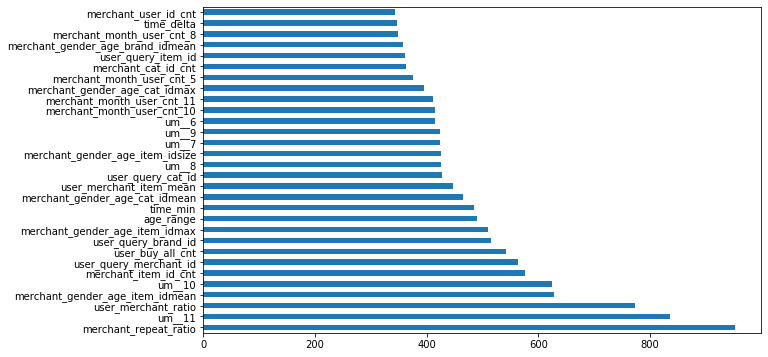

In [92]:
df = pd.DataFrame()
for i in range(0,5,1):
    #print(i)
    booster = models_lgb[i][1]
    df_ = pd.DataFrame(booster.feature_importance(importance_type='split'),index= booster.feature_name(),columns=[i])
    df = pd.concat([df,df_],axis=1)
df.sum(axis=1).sort_values(ascending=False).head(30).plot(kind='barh',figsize=(10,6))    

In [93]:
auc = 0
for i in range(0,5):
    auc += max(models_lgb[i][2]['valid_1']['auc'])
auc = auc/len(models_lgb)
auc

0.6795958581195811

In [ ]:
auc = 0
for i in range(0,5):
    auc += max(models_lgb[i][2]['training']['auc'])
auc = auc/len(models_lgb)
auc